# App Reviews

## Classification Algorithm - K Nearest Neighbors

## 1 Introduction 

In this document we will predict the valuation of an application by users, using a data set composed of 257 records with oppinions from users about the app.

For that, we will use the scikit-learn library and the K-Nearest Neighbors Classifier.

## 2 Import the necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## 3 Explore the data 

In [2]:
#load the dataset
df = pd.read_csv('reviews_sentiment.csv', sep = ';')
df.head(20)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


In [3]:
#check the metrics of the data
df.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


Comments => There are a total of 257 records (lines) and the start rating goes from 1 to 5. The total amount of words go from 1 to 103, while the feeling ratings go between -2.27 and 3.26 with a mean of 0.38 and a standard deviation between 0.38 - 0.89.

## 4 Data Visualization 

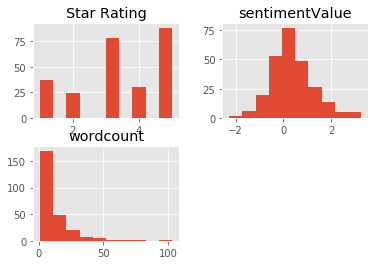

In [4]:
#visualize the numerical data with histograms
df.hist()
plt.show()

In [5]:
#check how many star ratings we have in the data frame
print(df.groupby('Star Rating').size())

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


With the previous table we can confirm that there are mostly 3 and 5 stars.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


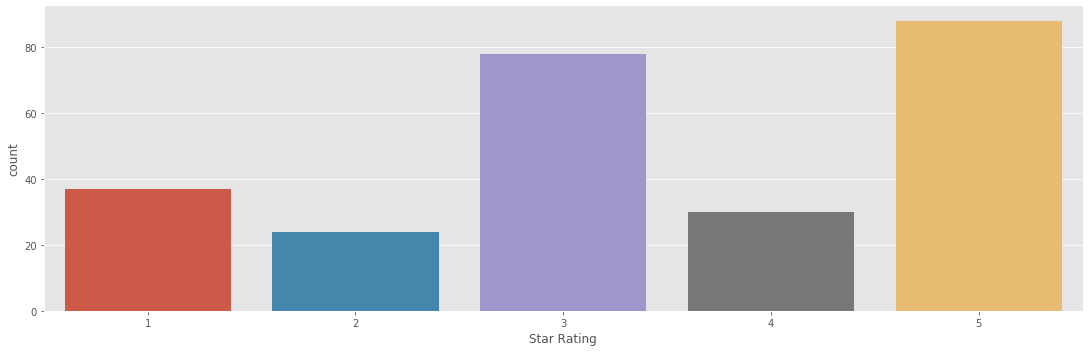

In [6]:
#visualize better start rating data distribution
sb.factorplot('Star Rating',data=df,kind="count", aspect=3)

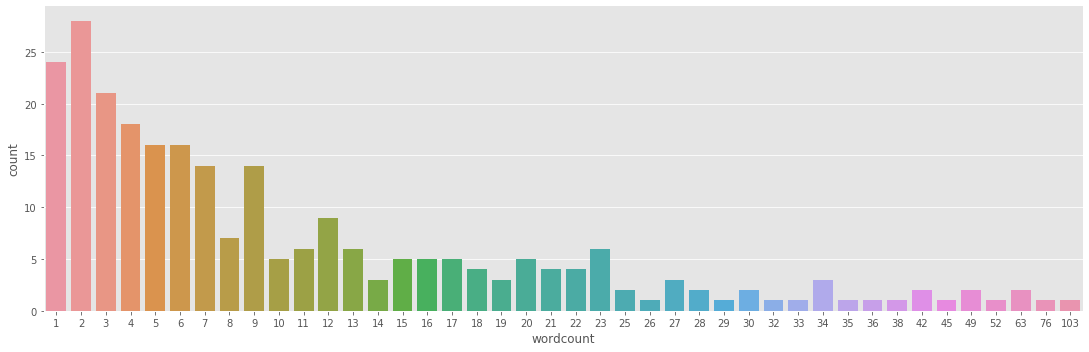

In [7]:
#Ensure that the most of the words are between 1 and 10
sb.factorplot('wordcount',data=df,kind="count", aspect=3)

## 5 Prediction and Evaluation 

### 5.1 Response and Feature Variables 

Firstly, separate the dataset into response variables (data to analyze) and feature variables (the target to achieve).

In [16]:
X = df[['wordcount', 'sentimentValue']].values    # X variable = store the data
y = df['Star Rating'].values   # y variable = store the classes/targets

### 5.2 Training and Test Split 

Secondly, split the data into training set and testing set, using the package train_test_split.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
#Applying Standard Scaling to get optimized results
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 5.3 Choose the best value for K 

([<matplotlib.axis.XTick at 0x1cab9965e10>,
 <a list of 5 Text xticklabel objects>)

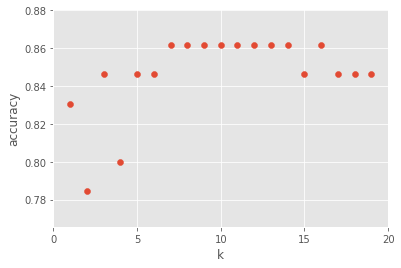

In [34]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

Comments => We can see that we would get better predictions with K values between 7 and 14. In our analysis, we will apply a K value 7 (k = 7)

### 5.4 Apply Nearest Neighbors Classifier 

In [25]:
#Define the K value (K=7)
n_neighbors = 7
#Build the K-Neighbors Classifier 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.86


Comments => We can se that the precission for the training set is 90%, while for the test set is 86%.

In [27]:
#check the performance of the model using confusion matrix
pred_KNN = knn.predict(X_test)
print(confusion_matrix(y_test, pred_KNN))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]


In [28]:
#check the performance of the model using classification report
print(classification_report(y_test, pred_KNN))

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65



Comments => the result for F1-score is 87%, which is a good punctuation. However, we realized that for the star rating 2 we have only 1 record, which is not enough to hava a good analysis.

Now, we can build the graph with the classification obtained, which will help us to see where the prediction will fall.

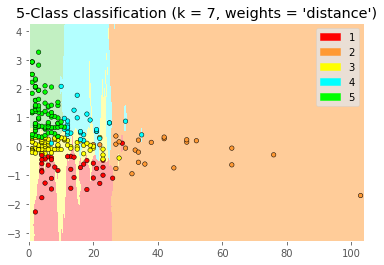

In [33]:
h = .02  # step size in the mesh

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])
 
# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])
 
    
plt.title("5-Class classification (k = 7, weights = 'distance')") 
plt.show()

Comments => We can see the 5 regions where there is a relationship between the sentimentValue and the Star Rating that the user leaves.

### 5.5  Classify and Predict new samples 

Let's image that we get new reviews. Let's see how to predict your stars:

In [35]:
#Prediction with new values
print(clf.predict([[5, 1.0]]))

[5]


Comments => The previos result means that for 5 word and a feeling of 1, the users will value the app with 5 stars.